In [1]:
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
# from keras.optimizers import SGD
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import re #regular expressions
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# source 
# https://medium.com/analytics-vidhya/chatbot-with-tensorflow-2-0-going-merry-2f79284a6104

### Import and load the data file

In [4]:
with open('intents.json', 'r') as f:
    intents = json.load(f)

print(intents)

{'intents': [{'tag': 'greetings', 'patterns': ['Hi', 'Hey', 'Hello', 'Hey there', 'Hello restaurant Taiwan'], 'responses': ['Hello and welcome to restaurant Taiwan', 'Hey there', 'Hi, how can I help you?', 'Welcome to restaurant Taiwan, I am your personal assistant. How can I help you?']}, {'tag': 'openinghours', 'patterns': ['what are the opening hours?', 'When is the restaurant closed?', 'Could you please give me the opening hours of the restaurant?', 'When is the restaurant open?'], 'responses': ['The restaurant is open from Thursday-Sunday from 5pm-10:30pm']}, {'tag': 'payments', 'patterns': ['Can i pay with credit card', 'Cash', 'Google Pay', 'Apple Pay', 'AMEX', 'Debit', 'Paypal', 'what are the payment methods?'], 'responses': ['We accept the following payment methods: Cash, VISA, Mastercard']}, {'tag': 'reservation', 'patterns': ['I want to make a reservation', 'Can you please help me to make a reservation?', 'Would you help me to make a reservation?'], 'responses': ['Sure, for 

In [5]:
# getting all the data to lists
tags = []
patterns = []
responses = {}
for intent in intents['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['patterns']:
        patterns.append(lines)
        tags.append(intent['tag'])

In [6]:
#converting to dataframe
df = pd.DataFrame({"patterns":patterns,
                     "tags":tags})
df

,patterns,tags
0,Hi,greetings
1,Hey,greetings
2,Hello,greetings
3,Hey there,greetings
4,Hello restaurant Taiwan,greetings
...,...,...
104,Can I see the menu?,menu
105,What is the menu?,menu
106,How big is the restaurant?,seats
107,How many seats,seats


### test train split

In [7]:
#X = df['patterns']
#y = df['tags']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
#X_train_clean = X_train.copy()
#X_test_clean = X_test.copy()

### Preprocessing

In [9]:
#removing punctuations
import string
df['patterns'] = df['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
df['patterns'] = df['patterns'].apply(lambda wrd: ''.join(wrd))

In [10]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(df['patterns'])
train = tokenizer.texts_to_sequences(df['patterns'])

In [11]:
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(train)

In [12]:

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
le = LabelEncoder()
y_train = le.fit_transform(df['tags'])
y_train_class = to_categorical(y_train)

### test train split

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Input Length, Output Length and Vocabulary

In [14]:
#input length
input_shape = X_train.shape[1]
print(input_shape)

11


In [15]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)

number of unique words :  119


In [16]:
#output length
output_length = le.classes_.shape[0]
print("output length: ",output_length)

output length:  22


### Neural network

In [17]:
#model = Sequential()
#model.add(Embedding(vocabulary+1,10, input_length = input_shape))
#model.add(LSTM(10, return_sequences=True))
#model.add(Flatten())
#model.add(Dense(output_length, activation="softmax"))

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#train = model.fit(X_train,y_train_class,epochs=200, validation_split=0.2)

In [18]:
#creating the model
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)
#compiling the model
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
#training the model
hist = model.fit(X_train,y_train_class,epochs=200, validation_split=0.2)

Epoch 1/200
3/3 [==============================] - 2s 179ms/step - loss: 3.0907 - accuracy: 0.0460 - val_loss: 3.1025 - val_accuracy: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 13ms/step - loss: 3.0854 - accuracy: 0.0805 - val_loss: 3.1087 - val_accuracy: 0.0000e+00
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 3.0806 - accuracy: 0.0920 - val_loss: 3.1166 - val_accuracy: 0.0000e+00
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 3.0747 - accuracy: 0.1264 - val_loss: 3.1260 - val_accuracy: 0.0000e+00
Epoch 5/200
3/3 [==============================] - 0s 11ms/step - loss: 3.0680 - accuracy: 0.1264 - val_loss: 3.1378 - val_accuracy: 0.0000e+00
Epoch 6/200
3/3 [==============================] - 0s 11ms/step - loss: 3.0600 - accuracy: 0.1379 - val_loss: 3.1528 - val_accuracy: 0.0000e+00
Epoch 7/200
3/3 [==============================] - 0s 12ms/step - loss: 3.0508 - accuracy: 0.1379 - val_loss: 3.1719 - val_accuracy: 0.

3/3 [==============================] - 0s 11ms/step - loss: 1.9583 - accuracy: 0.3448 - val_loss: 8.2955 - val_accuracy: 0.0000e+00
Epoch 58/200
3/3 [==============================] - 0s 12ms/step - loss: 1.9363 - accuracy: 0.3448 - val_loss: 8.4284 - val_accuracy: 0.0000e+00
Epoch 59/200
3/3 [==============================] - 0s 12ms/step - loss: 1.9150 - accuracy: 0.3448 - val_loss: 8.5879 - val_accuracy: 0.0000e+00
Epoch 60/200
3/3 [==============================] - 0s 12ms/step - loss: 1.8957 - accuracy: 0.3678 - val_loss: 8.6913 - val_accuracy: 0.0000e+00
Epoch 61/200
3/3 [==============================] - 0s 12ms/step - loss: 1.8752 - accuracy: 0.4253 - val_loss: 8.7960 - val_accuracy: 0.0000e+00
Epoch 62/200
3/3 [==============================] - 0s 12ms/step - loss: 1.8555 - accuracy: 0.4253 - val_loss: 8.8828 - val_accuracy: 0.0000e+00
Epoch 63/200
3/3 [==============================] - 0s 12ms/step - loss: 1.8369 - accuracy: 0.4253 - val_loss: 8.9804 - val_accuracy: 0.0000e+0

3/3 [==============================] - 0s 12ms/step - loss: 1.2024 - accuracy: 0.7931 - val_loss: 12.6319 - val_accuracy: 0.0455
Epoch 115/200
3/3 [==============================] - 0s 11ms/step - loss: 1.1926 - accuracy: 0.7126 - val_loss: 12.6579 - val_accuracy: 0.0455
Epoch 116/200
3/3 [==============================] - 0s 12ms/step - loss: 1.1831 - accuracy: 0.6782 - val_loss: 12.6868 - val_accuracy: 0.0455
Epoch 117/200
3/3 [==============================] - 0s 11ms/step - loss: 1.1726 - accuracy: 0.7356 - val_loss: 12.7044 - val_accuracy: 0.0455
Epoch 118/200
3/3 [==============================] - 0s 12ms/step - loss: 1.1628 - accuracy: 0.7471 - val_loss: 12.7263 - val_accuracy: 0.0455
Epoch 119/200
3/3 [==============================] - 0s 12ms/step - loss: 1.1531 - accuracy: 0.7241 - val_loss: 12.7719 - val_accuracy: 0.0455
Epoch 120/200
3/3 [==============================] - 0s 12ms/step - loss: 1.1432 - accuracy: 0.6897 - val_loss: 12.8302 - val_accuracy: 0.0455
Epoch 121/200

3/3 [==============================] - 0s 12ms/step - loss: 0.6960 - accuracy: 0.9080 - val_loss: 14.0963 - val_accuracy: 0.0455
Epoch 172/200
3/3 [==============================] - 0s 11ms/step - loss: 0.6873 - accuracy: 0.9310 - val_loss: 14.1122 - val_accuracy: 0.0455
Epoch 173/200
3/3 [==============================] - 0s 11ms/step - loss: 0.6797 - accuracy: 0.9425 - val_loss: 14.1266 - val_accuracy: 0.0455
Epoch 174/200
3/3 [==============================] - 0s 12ms/step - loss: 0.6724 - accuracy: 0.9425 - val_loss: 14.1507 - val_accuracy: 0.0455
Epoch 175/200
3/3 [==============================] - 0s 12ms/step - loss: 0.6677 - accuracy: 0.9425 - val_loss: 14.1654 - val_accuracy: 0.0455
Epoch 176/200
3/3 [==============================] - 0s 12ms/step - loss: 0.6583 - accuracy: 0.9540 - val_loss: 14.1704 - val_accuracy: 0.0455
Epoch 177/200
3/3 [==============================] - 0s 11ms/step - loss: 0.6507 - accuracy: 0.9540 - val_loss: 14.1891 - val_accuracy: 0.0455
Epoch 178/200

------------------------------------------------------------------------------

### Evaluating the model

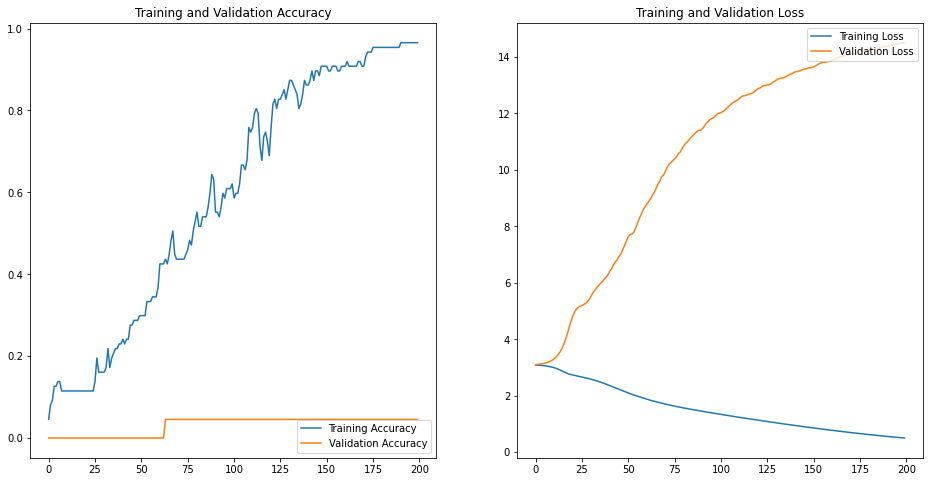

In [19]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Testing

In [ ]:
#chatting
import random
while True:
    texts_p = []
    prediction_input = input('You : ')
  #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
  #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
  #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()
  #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Going Merry : ",random.choice(responses[response_tag]))
    if response_tag == "goodbye":
        break